# Phishing Link Detection Machine Learning

Jonathan Christyadi (502705) - AI Core 02


This notebook aims at predicting the likelihood of a link being a phishing link or a legitimate link with a focus on exploring and testing hypotheses that necessitate further research.

In [653]:
import sklearn
import pandas as pd
import seaborn
import numpy as np
print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", seaborn.__version__)          # 0.12.1

scikit-learn version: 1.4.1.post1
pandas version: 2.2.1
seaborn version: 0.13.2


In [654]:
df = pd.read_csv("Data\dataset_link_phishing.csv", sep=',', index_col=False, dtype='unicode')
df.head()

id                                                url url_length  \
0  0     http://www.progarchives.com/album.asp?id=61737         46   
1  1  http://signin.eday.co.uk.ws.edayisapi.dllsign....        128   
2  2  http://www.avevaconstruction.com/blesstool/ima...         52   
3  3                              http://www.jp519.com/         21   
4  4                       https://www.velocidrone.com/         28   

  hostname_length ip total_of. total_of- total_of@ total_of? total_of&  ...  \
0              20  0         3         0         0         1         0  ...   
1             120  0        10         0         0         0         0  ...   
2              25  0         3         0         0         0         0  ...   
3              13  0         2         0         0         0         0  ...   
4              19  0         2         0         0         0         0  ...   

  domain_in_title domain_with_copyright whois_registered_domain  \
0               1                   one                       0   
1               1                  zero                       0   
2               1                  zero                       0   
3               1                   one                       0   
4               0                  zero                       0   

  domain_registration_length domain_age web_traffic dns_record google_index  \
0                        627       6678       78526          0            0   
1                        300         65           0          0            1   
2                        119       1707           0          0            1   
3                        130       1331           0          0            0   
4                        164       1662      312044          0            0   

  page_rank      status  
0         5    phishing  
1         0    phishing  
2         0    phishing  
3         0  legitimate  
4         4  legitimate  

[5 rows x 87 columns]

In [655]:
df.sample(5)

id                                                url url_length  \
15407  7406               https://novataenchina.wordpress.com/         36   
11782  3781  https://212897764576871473832-dot-bn058.csb.ap...         78   
14318  6317  http://docs.textadventures.co.uk/quest/guides/...         69   
16437  8436             http://www.networkandwebsolutions.com/         38   
481     481                 https://twitter.com/cbsthismorning         34   

      hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
15407              27  1         2         0         0         0         0   
11782              39  1         4         2         1         1         1   
14318              25  1         4         0         0         0         0   
16437              30  1         2         0         0         0         0   
481                11  0         1         0         0         0         0   

       ... domain_in_title domain_with_copyright whois_registered_domain  \
15407  ...               1                     1                       0   
11782  ...               1                     0                       0   
14318  ...               1                     0                       0   
16437  ...               1                     1                       0   
481    ...               1                  zero                       0   

      domain_registration_length domain_age web_traffic dns_record  \
15407                        586       7449           0          0   
11782                        290        805       44822          0   
14318                        190       4924      321794          0   
16437                        289       1903           0          0   
481                          182       7488          63          0   

      google_index page_rank      status  
15407            0         8  legitimate  
11782            0         1    phishing  
14318            0         4  legitimate  
16437            0         2  legitimate  
481              0        10  legitimate  

[5 rows x 87 columns]

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          19431 non-null  object
 1   url                         19431 non-null  object
 2   url_length                  19431 non-null  object
 3   hostname_length             19431 non-null  object
 4   ip                          19431 non-null  object
 5   total_of.                   19431 non-null  object
 6   total_of-                   19431 non-null  object
 7   total_of@                   19431 non-null  object
 8   total_of?                   19431 non-null  object
 9   total_of&                   19431 non-null  object
 10  total_of=                   19431 non-null  object
 11  total_of_                   19431 non-null  object
 12  total_of~                   19431 non-null  object
 13  total_of%                   19431 non-null  ob

In [657]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
df.head()


id                                                url url_length  \
0  0     http://www.progarchives.com/album.asp?id=61737         46   
1  1  http://signin.eday.co.uk.ws.edayisapi.dllsign....        128   
2  2  http://www.avevaconstruction.com/blesstool/ima...         52   
3  3                              http://www.jp519.com/         21   
4  4                       https://www.velocidrone.com/         28   

  hostname_length ip total_of. total_of- total_of@ total_of? total_of&  ...  \
0              20  0         3         0         0         1         0  ...   
1             120  0        10         0         0         0         0  ...   
2              25  0         3         0         0         0         0  ...   
3              13  0         2         0         0         0         0  ...   
4              19  0         2         0         0         0         0  ...   

  domain_in_title domain_with_copyright whois_registered_domain  \
0               1                   one                       0   
1               1                  zero                       0   
2               1                  zero                       0   
3               1                   one                       0   
4               0                  zero                       0   

  domain_registration_length domain_age web_traffic dns_record google_index  \
0                        627       6678       78526          0            0   
1                        300         65           0          0            1   
2                        119       1707           0          0            1   
3                        130       1331           0          0            0   
4                        164       1662      312044          0            0   

  page_rank status  
0         5      1  
1         0      1  
2         0      1  
3         0      0  
4         4      0  

[5 rows x 87 columns]

In [658]:
df['domain_with_copyright'] = df['domain_with_copyright'].map({'one': 1, 'zero': 0, 'Zero': 0, 'One': 1,'1': 1, '0': 0})
df['domain_with_copyright'].unique()

array([1, 0], dtype=int64)

In [659]:
# Calculate the total number of missing values in the DataFrame
total_na = df.isna().sum()
total_na.sum()


0

In [660]:
# Calculate the total number of missing values in the DataFrame
total_null = df.isnull().sum()
total_null.sum()


0

In [661]:
df = df.drop(columns=['id', 'url'])
df.head()

url_length hostname_length ip total_of. total_of- total_of@ total_of?  \
0         46              20  0         3         0         0         1   
1        128             120  0        10         0         0         0   
2         52              25  0         3         0         0         0   
3         21              13  0         2         0         0         0   
4         28              19  0         2         0         0         0   

  total_of& total_of= total_of_  ... domain_in_title domain_with_copyright  \
0         0         1         0  ...               1                     1   
1         0         0         0  ...               1                     0   
2         0         0         0  ...               1                     0   
3         0         0         0  ...               1                     1   
4         0         0         0  ...               0                     0   

  whois_registered_domain domain_registration_length domain_age web_traffic  \
0                       0                        627       6678       78526   
1                       0                        300         65           0   
2                       0                        119       1707           0   
3                       0                        130       1331           0   
4                       0                        164       1662      312044   

  dns_record google_index page_rank status  
0          0            0         5      1  
1          0            1         0      1  
2          0            1         0      1  
3          0            0         0      0  
4          0            0         4      0  

[5 rows x 85 columns]

In [662]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(100, 100))
plot = sns.heatmap(corr, annot=True, fmt='.2f', linewidths=2)


In [663]:
selected_features = ['url_length', 'hostname_length', 'total_of?', 'total_of.', 'total_of-', 'total_of/', 'total_of_www','ratio_digits_url','phish_hints', 'nb_hyperlinks','domain_in_title','google_index','page_rank']

df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Check the data types of the selected columns after conversion
print(df[selected_features].dtypes)

# Check if 'status' column exists and has categorical or numerical data
print(df['status'].dtype)

# Create a DataFrame with the selected columns
selected_df = df[selected_features + ['status']]
selected_df.head()

url_length            int64
hostname_length       int64
total_of?             int64
total_of.             int64
total_of-             int64
total_of/             int64
total_of_www          int64
ratio_digits_url    float64
phish_hints           int64
nb_hyperlinks         int64
domain_in_title       int64
google_index          int64
page_rank             int64
dtype: object
int64


url_length  hostname_length  total_of?  total_of.  total_of-  total_of/  \
0          46               20          1          3          0          3   
1         128              120          0         10          0          3   
2          52               25          0          3          0          4   
3          21               13          0          2          0          3   
4          28               19          0          2          0          3   

   total_of_www  ratio_digits_url  phish_hints  nb_hyperlinks  \
0             1          0.108696            0            143   
1             0          0.054688            2              0   
2             1          0.000000            0              3   
3             1          0.142857            0            404   
4             1          0.000000            0             57   

   domain_in_title  google_index  page_rank  status  
0                1             0          5       1  
1                1             1          0       1  
2                1             1          0       1  
3                1             0          0       0  
4                0             0          4       0

In [664]:
from sklearn.preprocessing import StandardScaler
# Scale the data
selected_df = selected_df.dropna()
scaler = StandardScaler()
selected_df[selected_features] = scaler.fit_transform(selected_df[selected_features])


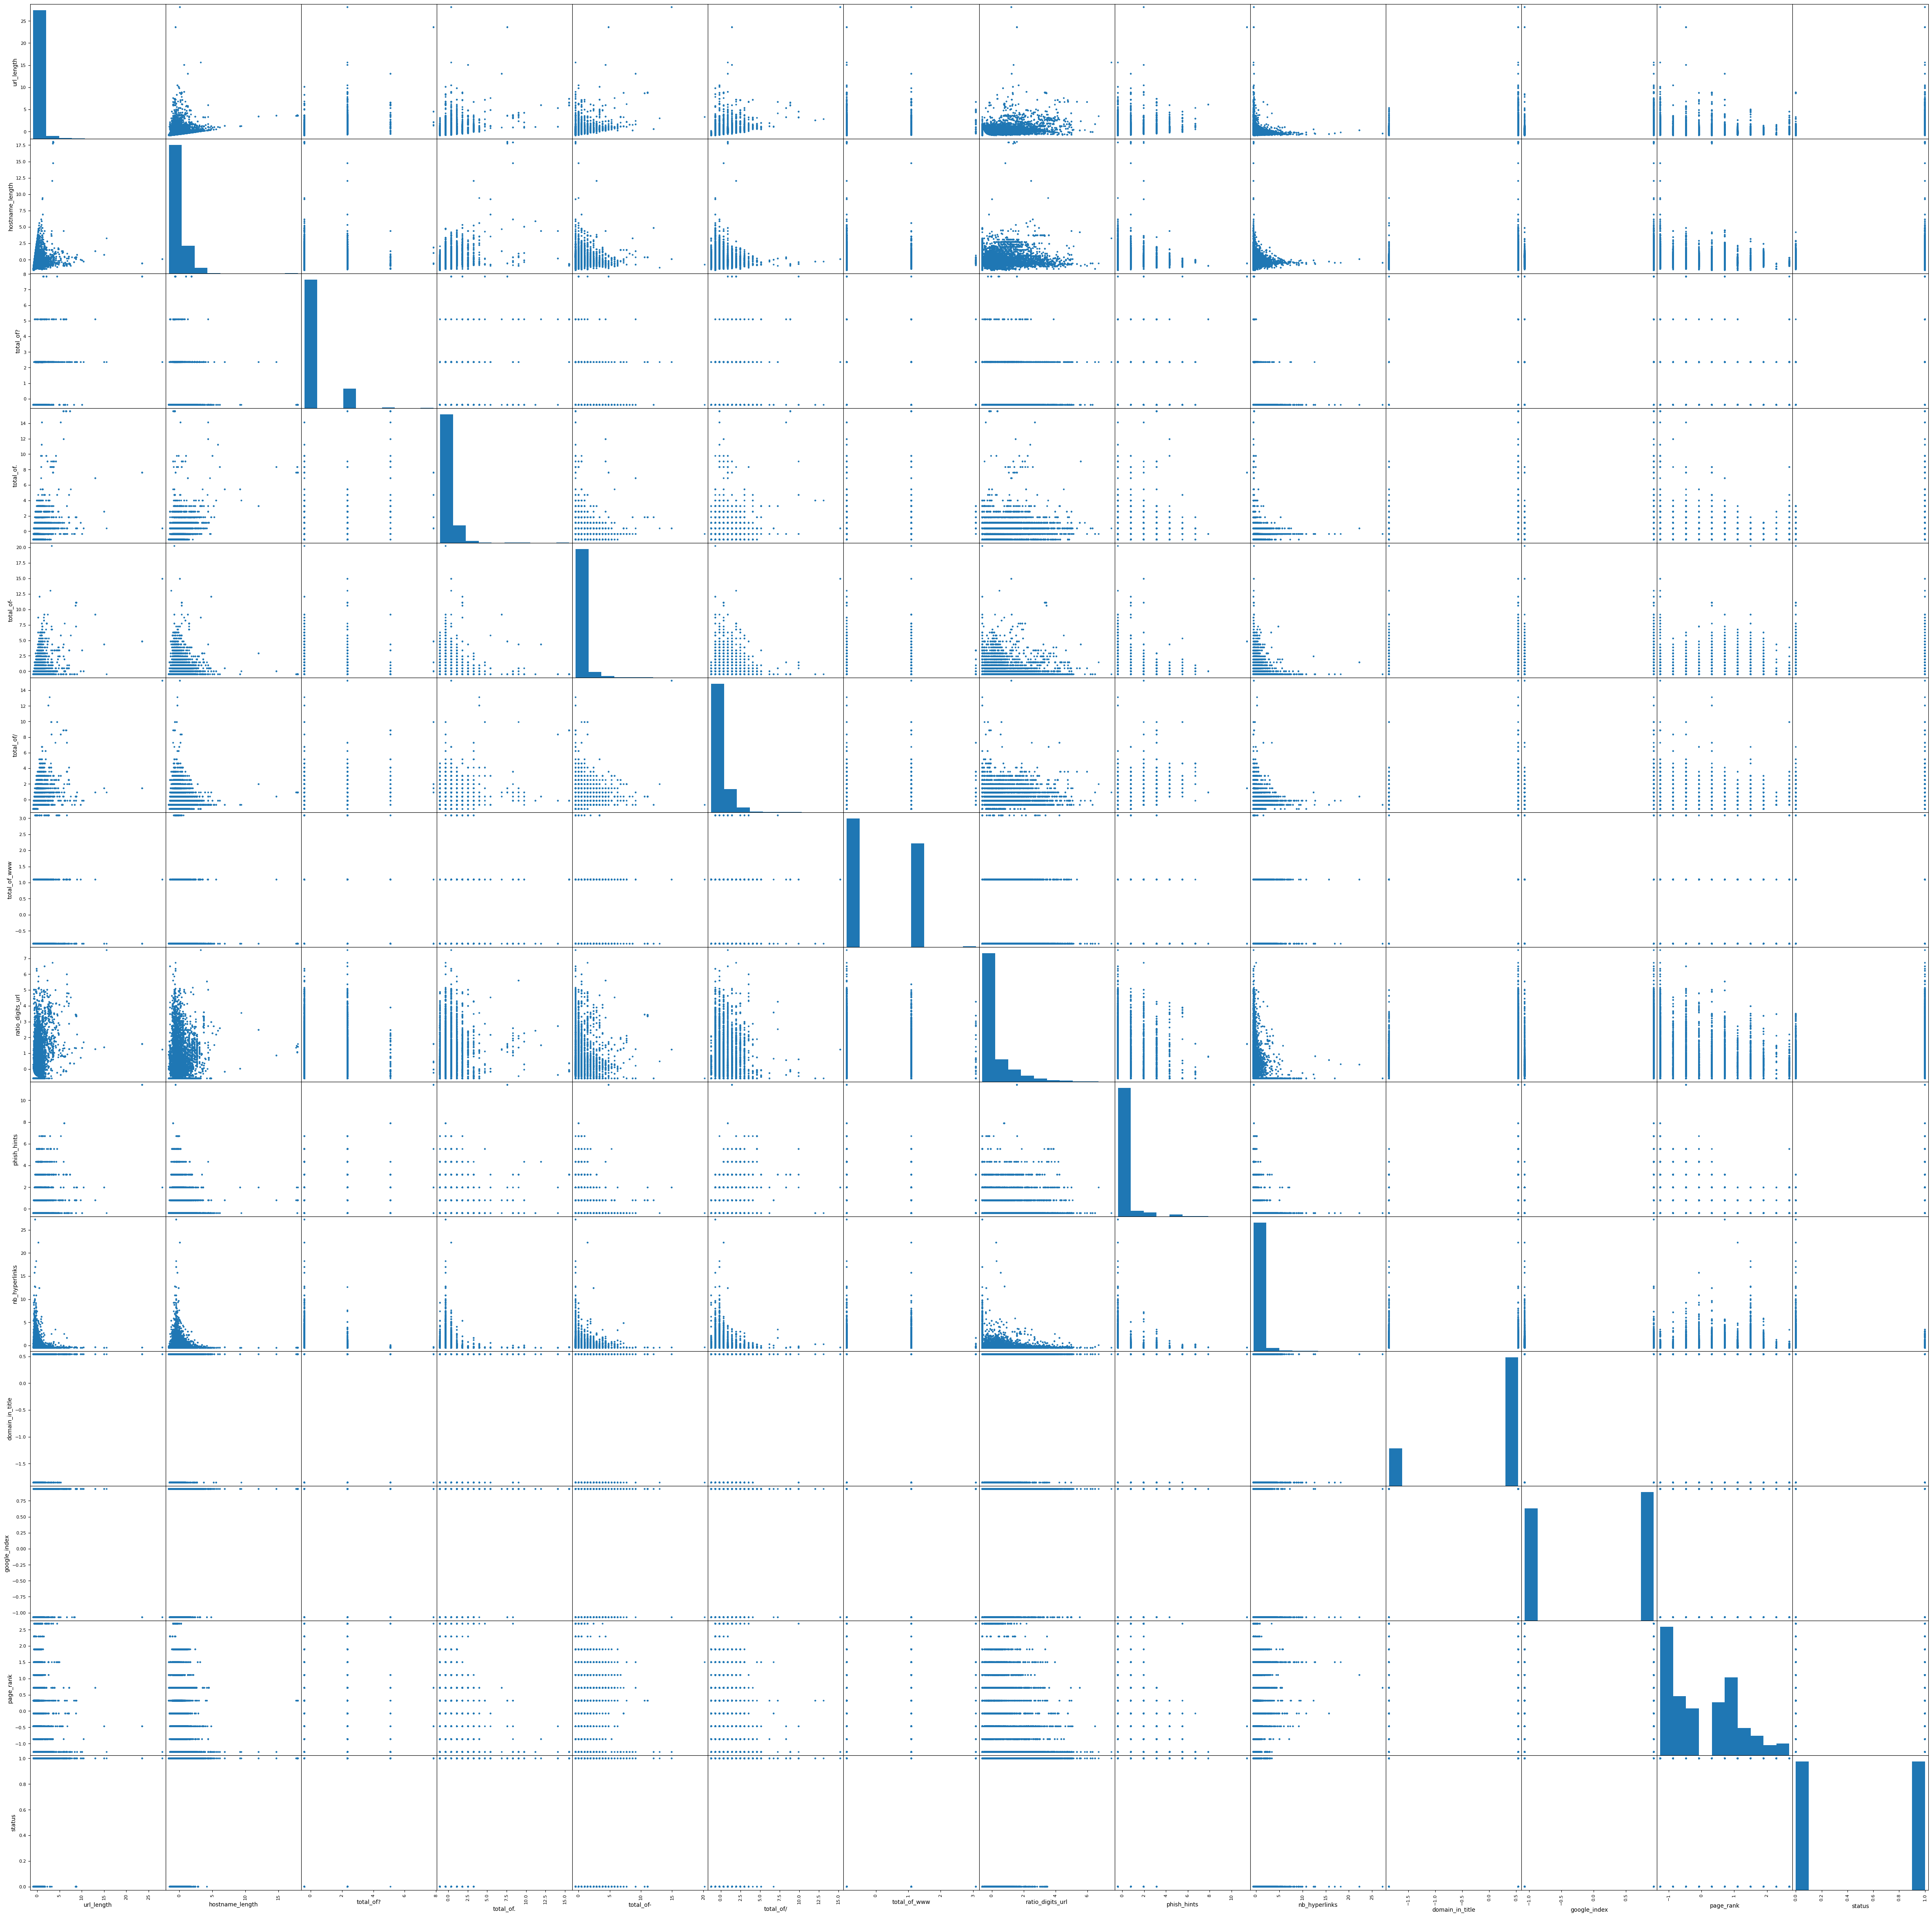

In [665]:
from pandas.plotting import scatter_matrix
scatter_matrix(selected_df, alpha=1, figsize=(60, 60), diagonal='hist')
plt.show()

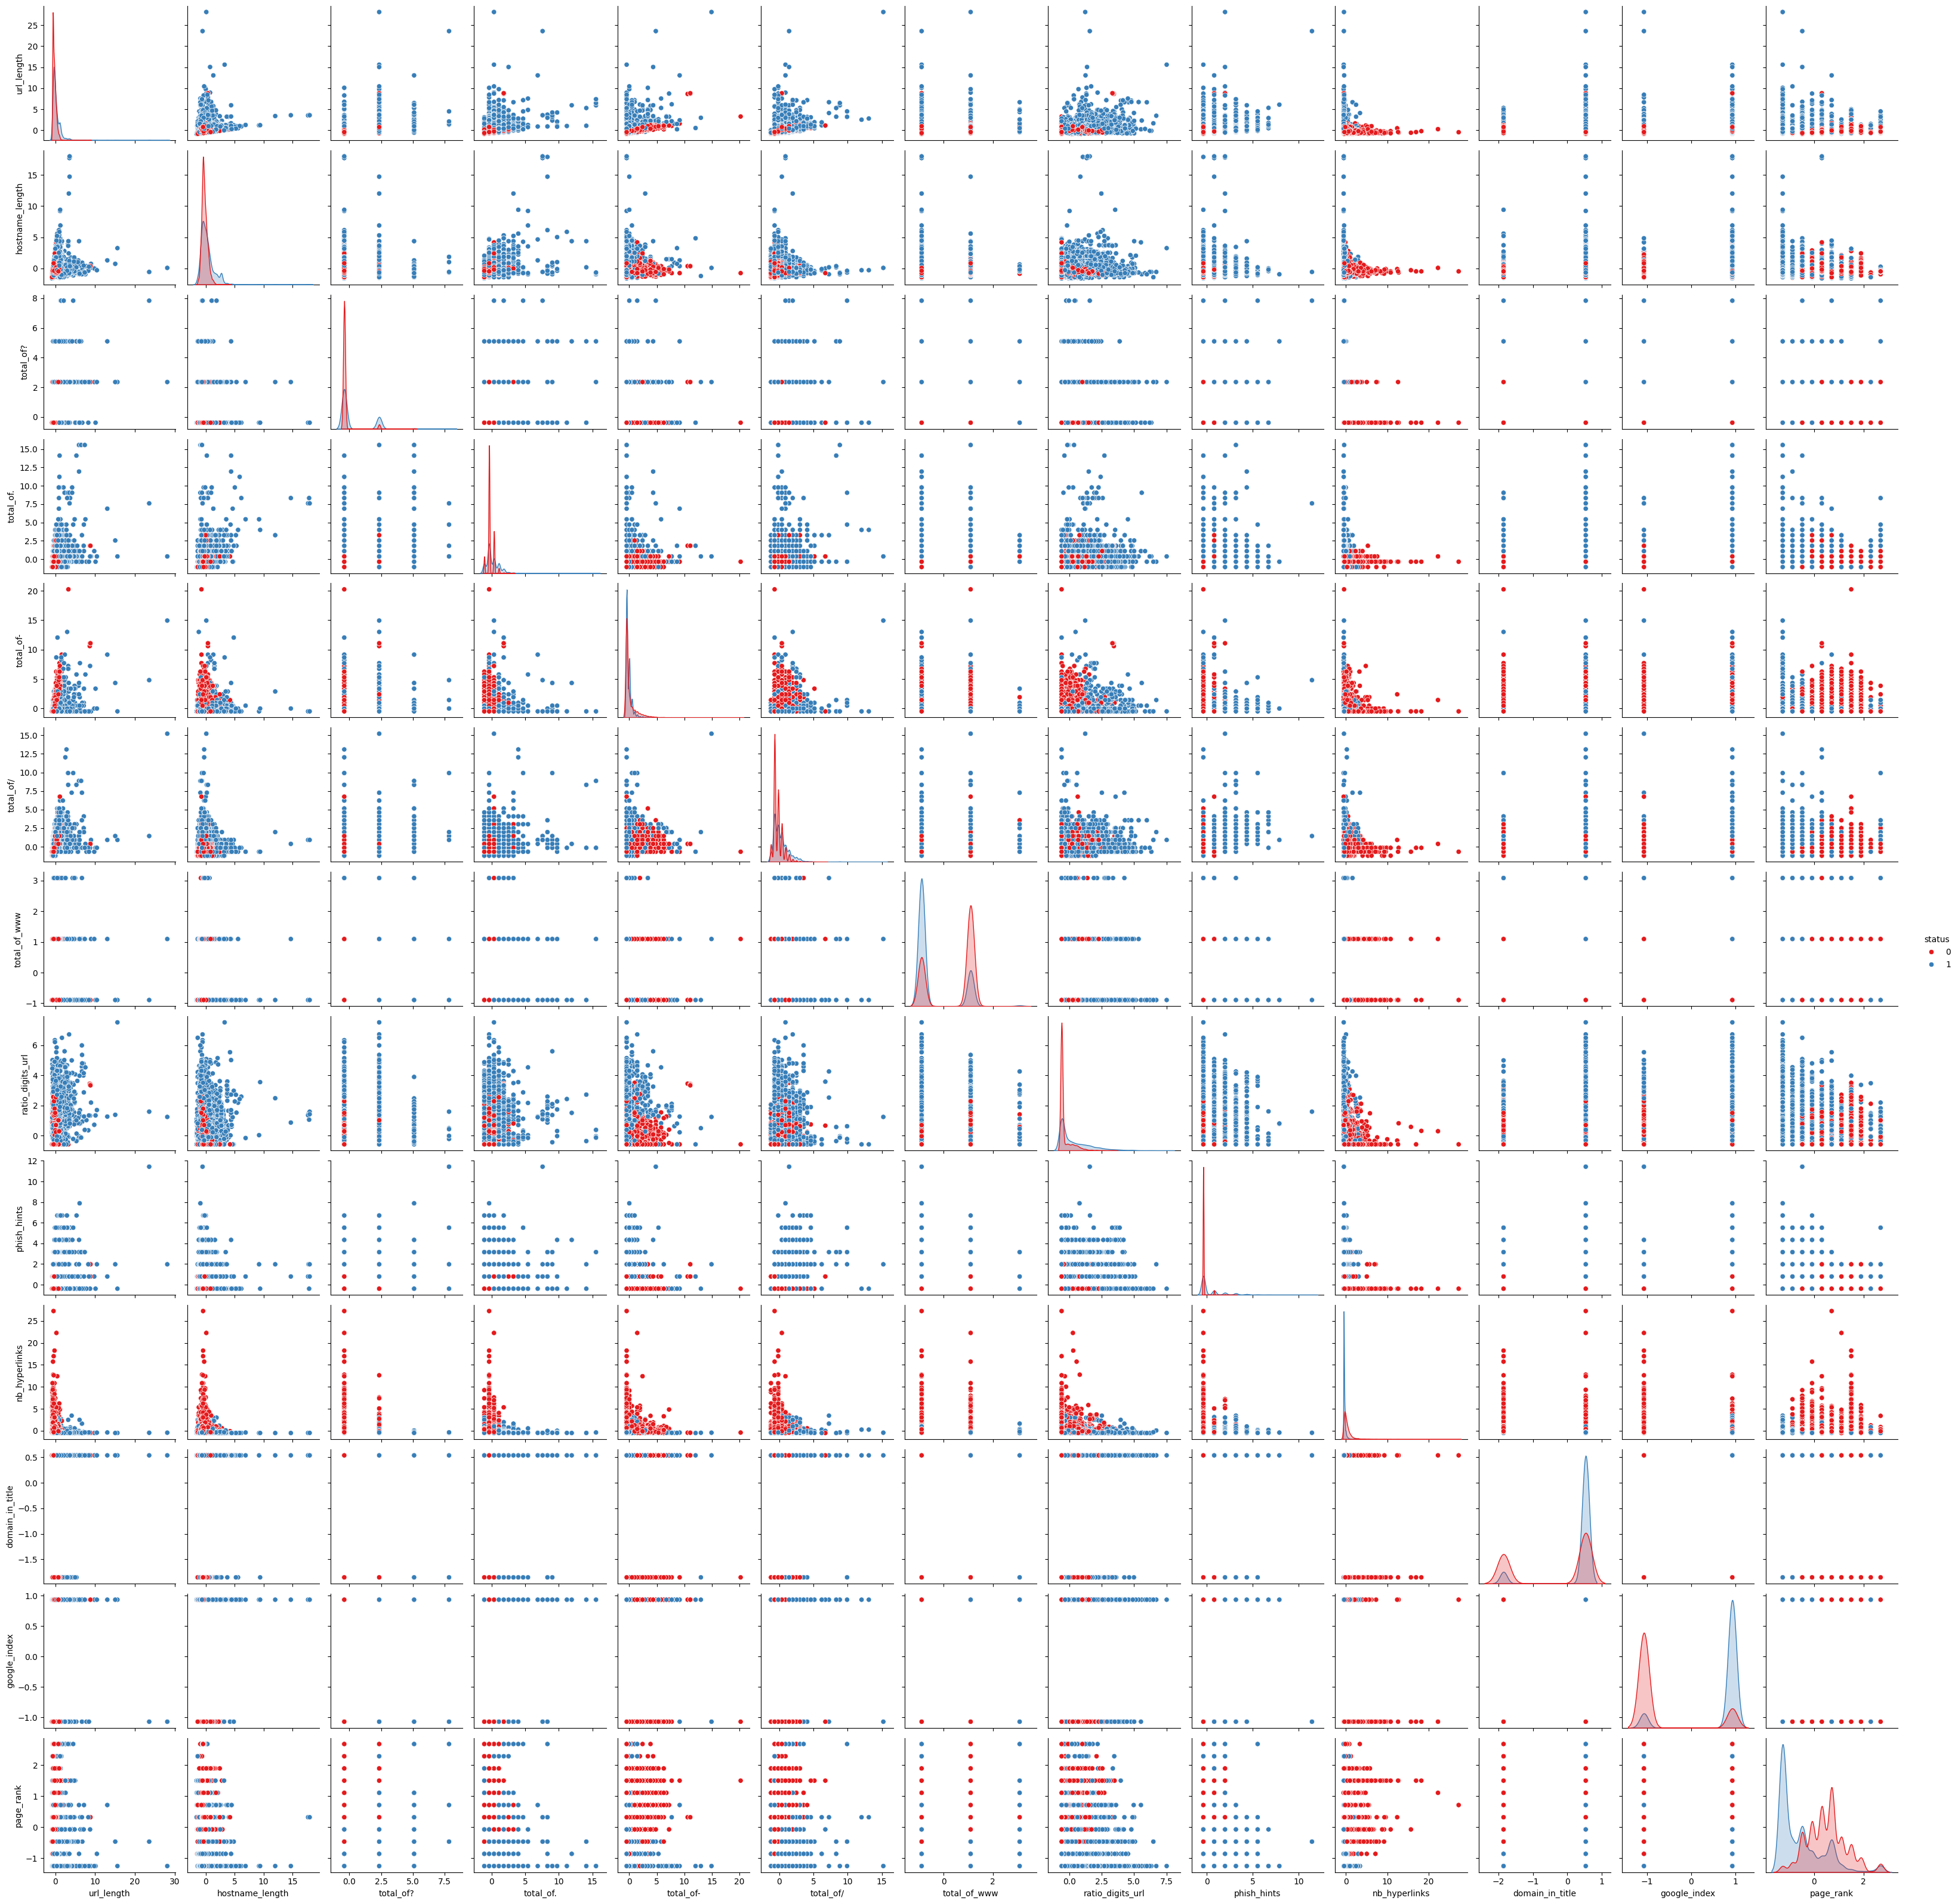

In [666]:
# Create pairplot
sns.pairplot(selected_df, hue='status', palette='Set1')

# Show the plot
plt.show()

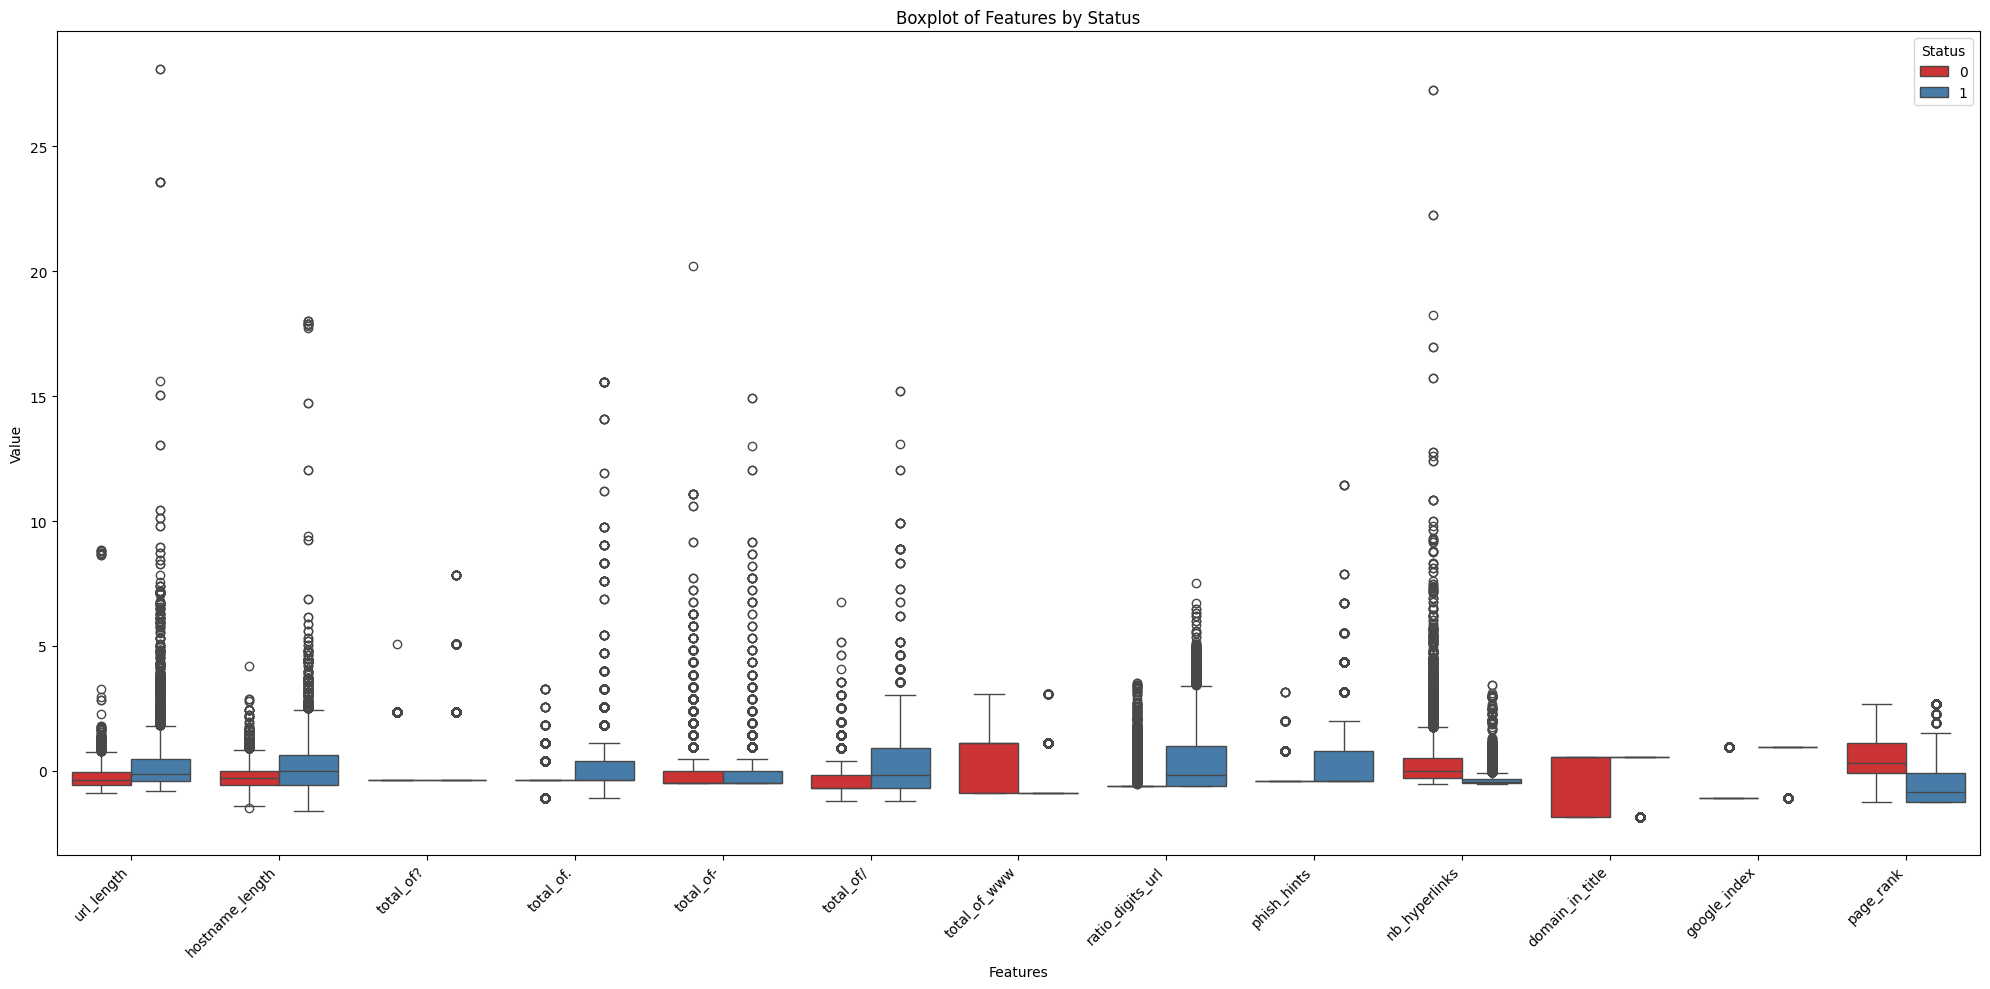

In [667]:
melted_df = pd.melt(selected_df, id_vars='status', value_vars=selected_features, 
                    var_name='feature', value_name='value')

# Create boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='feature', y='value', hue='status', data=melted_df, palette='Set1')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Boxplot of Features by Status')
plt.xlabel('Features')
plt.ylabel('Value')
plt.legend(title='Status')
plt.tight_layout()

# Show the plot
plt.show()